In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
import numpy as np
from pathlib import Path
from utils import getsize
import pandas as pd

In [2]:
files = Path('res/second/')

In [3]:
data = {}
for fl in files.glob('*?test3.pkl'):
    with open(fl, 'rb') as fh: data[str(fl)] = pickle.load(fh)

In [4]:
KEYS = list(data.keys())
KEYS = sorted(KEYS)

N = len(data[KEYS[0]][1])
L = data[KEYS[0]][1][0]['L']

df = pd.DataFrame([k.replace('--', '-')[11:-10].split('-') for k in KEYS])
df.columns = ['N', 'T', 'D', 'pt', 'market', 'freq', 'seed', 'only_update_price', 'flat', 'start']

df.flat = df.flat.fillna(False)
df.only_update_price = df.only_update_price.fillna(False)

for col in ['N', 'T', 'D', 'seed', 'start']:
    df[col] = df[col].astype(int)
    
for col in ['only_update_price', 'flat', 'market']:
    df[col] = df[col].map(lambda x: True if x=='True' else False)

In [5]:
df.sort_values('seed')

,N,T,D,pt,market,freq,seed,only_update_price,flat,start
17,50,48,5,solar,True,1,50,True,True,50
15,50,48,5,pesimistic,False,None,50,True,True,50
14,50,48,5,pesimistic,False,None,50,True,False,50
3,50,48,5,neutral,True,1,50,True,False,50
4,50,48,5,neutral,True,1,50,True,True,50
9,50,48,5,optimistic,True,1,50,True,False,50
5,50,48,5,neutral,True,1,80,True,False,80
10,50,48,5,optimistic,True,1,80,True,False,80
16,50,48,5,pesimistic,False,None,80,True,False,80
11,50,48,5,pesimistic,False,None,101,True,False,101


In [6]:
KEYS[17]

'res/second/50-48-5-solar-True-1-50-True-True-50?test3.pkl'

In [16]:
L - 48

192

In [13]:
num = 17
key = KEYS[num]
dt = data[key][1]

In [14]:
dt[0]['allload']

array([ 0.203     ,  2.059     ,  2.397     ,  2.498     ,  2.51      ,
        1.72      ,  0.082     ,  1.279     ,  2.494     ,  0.158     ,
        0.114     ,  0.118     , -0.0354904 , -0.19714913,  0.74480192,
        0.00693304, -0.09318785,  1.39898324,  2.59958889,  2.66680267,
        2.71375966,  2.63134966,  2.12061336,  1.01869882,  0.90606724,
        0.56687214,  0.63830406,  0.20214758, -0.06636089,  0.03195527,
        0.08335854,  0.12025763,  0.28817947,  1.31381342,  0.92254143,
        1.35901715,  1.728     ,  2.219     ,  2.348     ,  2.018     ,
        1.939     ,  2.086     ,  1.964     ,  1.951     ,  1.88      ,
        2.038     ,  1.442     ,  1.349     ,  0.105     ,  2.113     ,
        0.723     ,  0.134     ,  0.985     ,  0.171     ,  0.142     ,
        0.142     ,  0.772     ,  0.131     ,  0.088     ,  0.134     ,
        0.08291892,  0.01345573,  0.04382165,  0.02490911,  1.60693294,
        2.94693692,  2.59933524,  2.02826613,  1.47981907,  1.39

In [16]:
dt[0]['allforecast']

array([ 0.203     ,  2.059     ,  2.397     ,  2.498     ,  2.51      ,
        1.72      ,  0.082     ,  1.279     ,  2.494     ,  0.158     ,
        0.114     ,  0.118     , -0.0354904 , -0.19714913,  0.74480192,
        0.00693304, -0.09318785,  1.39898324,  2.59958889,  2.66680267,
        2.71375966,  2.63134966,  2.12061336,  1.01869882,  0.90606724,
        0.56687214,  0.63830406,  0.20214758, -0.06636089,  0.03195527,
        0.08335854,  0.12025763,  0.28817947,  1.31381342,  0.92254143,
        1.35901715,  1.728     ,  2.219     ,  2.348     ,  2.018     ,
        1.939     ,  2.086     ,  1.964     ,  1.951     ,  1.88      ,
        2.038     ,  1.442     ,  1.349     ,  0.105     ,  2.113     ,
        0.723     ,  0.134     ,  0.985     ,  0.171     ,  0.142     ,
        0.142     ,  0.772     ,  0.131     ,  0.088     ,  0.134     ,
        0.08291892,  0.01345573,  0.04382165,  0.02490911,  1.60693294,
        2.94693692,  2.59933524,  2.02826613,  1.47981907,  1.39

In [17]:
def proc_data(num):
    key = KEYS[num]
    dt = data[key][1]
    pb = dt[0]['allprices'][:, 3][: L - 47]
    ps = dt[0]['allprices'][:, 0][: L - 47]
    
    net_load     = np.vstack([dt[n]['history_post_net'] for n in range(N)]).sum(axis=0)[: L - 47]
    net_pre      = np.vstack([dt[n]['history_pre_net'] for n in range(N)]).sum(axis=0)[: L - 47].round(1)
    #load         = np.vstack([dt[n]['allload'] for n in range(N)]).sum(axis=0)[: L - 47]
    #real_cost    = np.vstack([dt[n]['history_cost'] for n in range(N)]).sum(axis=0).sum().round(1)
    load = np.vstack([dt[n]['load'] for n in range(N)])
    real_cost = np.array([dt[n]['history_cost'].sum() for n in range(N)])
    #default_cost = (((load > 0).astype(float) * load * pb) + ((load < 0).astype(float) * load * ps)).sum().round(1)
    #real_cost_2 = (((net_load > 0).astype(float) * net_load * pb) + ((net_load < 0).astype(float) * net_load * ps)).sum().round(1)
    
    
    
    return net_load, net_pre, load, real_cost

In [19]:
cost = (np.clip(flat_default[2], a_min=0, a_max=1000) * 12) + (np.clip(flat_default[2], a_min=-1000, a_max=0) * 10)

In [20]:
cost.sum(axis=1) < flat_default[3]

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [21]:
flat_default[3]

array([1923.92693276, 1261.6836243 , -134.49934909,  592.7446903 ,
        633.31211484, 1170.04394421,  365.96238289, 1064.68200075,
        311.77339658,  218.62845088, 1253.19476526,  335.70859997,
        916.91147847,  758.46355049,  233.68914815, 1099.94300195,
        679.99676966,  927.68226493,  535.1732645 ,  242.0798776 ,
        621.82191156,  734.2860224 ,  395.50385351,  243.27485552,
        750.30947444, -118.06296832,   14.45772853,  218.44734   ,
        361.96572   ,  612.56586   ,  599.84859   ,   77.32419172,
        401.23551   , 1190.04879   ,  312.8568    , 1345.8297    ,
        282.06507   , 1265.78667   ,  330.18207   , 1223.06004   ,
        699.90456   ,  957.54      ,   47.27384161,  471.77376   ,
        974.44914   ,  652.77273   ,  199.73721   ,  441.41988   ,
        257.7909    ,  383.43837   ])

Cost only bat        :  30340.00853040039
Cost market solar    :  29429.019551064288
Cost market neutral  :  28939.74795595371


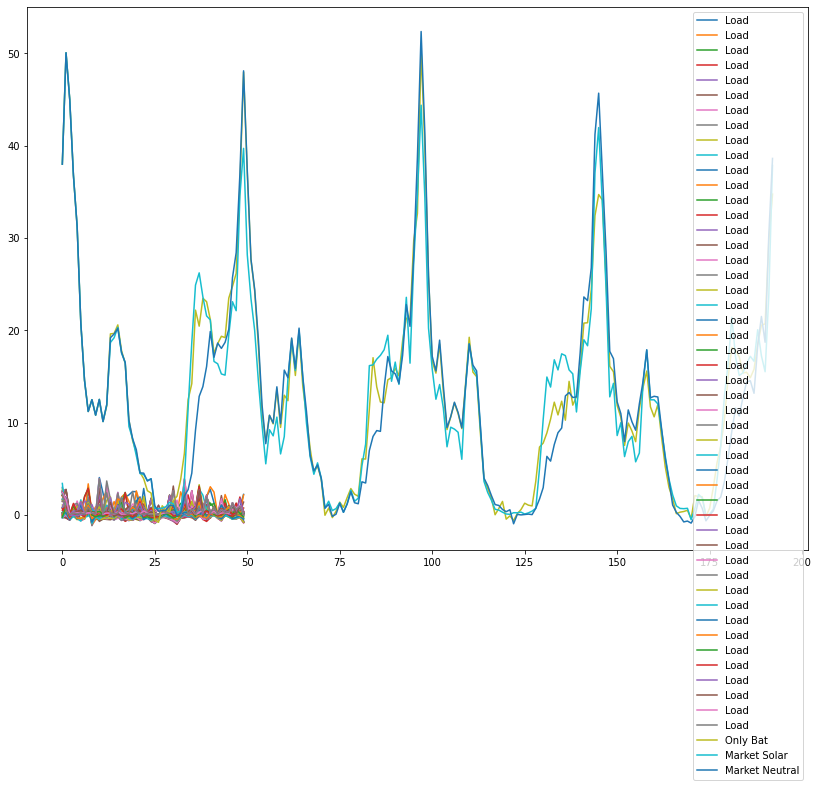

In [18]:
flat_solar = proc_data(17)
flat_default = proc_data(15)
flat_neutral = proc_data(4)

## Same base load
assert np.allclose(flat_solar[2] - flat_default[2], 0)
assert np.allclose(flat_solar[2] - flat_neutral[2], 0)


#### Begin Plot

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111)

ax.plot(flat_default[2], label='Load')
ax.plot(flat_default[0], label='Only Bat')
ax.plot(flat_solar[0], label='Market Solar')
ax.plot(flat_neutral[0], label='Market Neutral')

ax.legend()

#### End Plot

#print("Cost pure load       : ", flat_default[4])
print("Cost only bat        : ", flat_default[3].sum())
#print("Cost only bat  2     : ", flat_default[7])
print("Cost market solar    : ", flat_solar[3].sum())
print("Cost market neutral  : ", flat_neutral[3].sum())

2099.400314561955


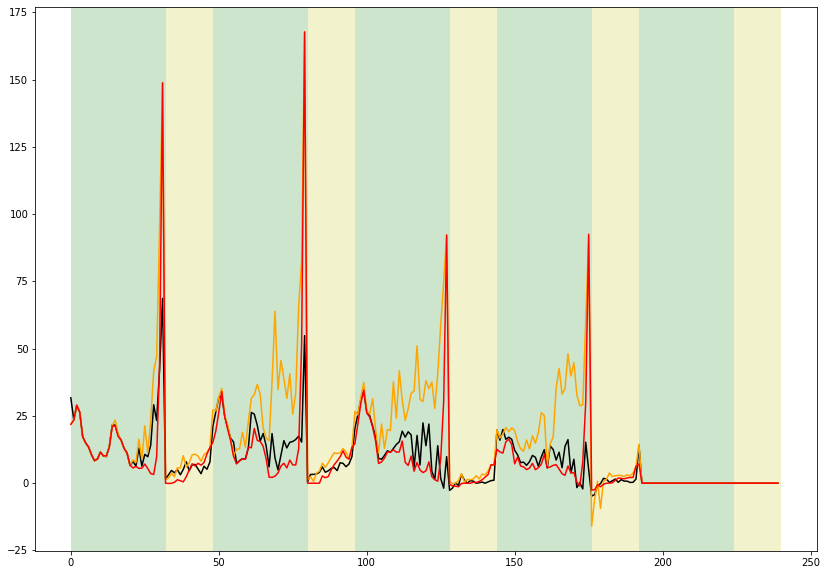

In [7]:
dd_1 = data['res/second/50-48-5-neutral-True-1-101-True-False-101?test2.pkl'][1]
v_post = np.vstack([dd_1[n]['history_post_net'] for n in range(N)]).sum(axis=0)
v_pre = np.vstack([dd_1[n]['history_pre_net'] for n in range(N)]).sum(axis=0)
l_market = np.vstack([dd_1[n]['allload'] for n in range(N)]).sum(axis=0)

market_cost = np.vstack([dd_1[n]['history_cost'] for n in range(N)]).sum(axis=0).sum()

prices_b = dd_1[0]['allprices'][:, 3]
prices_s = dd_1[0]['allprices'][:, 0]

dd_2 = data['res/second/50-48-5-pesimistic-False-None-101-True-False-101?test2.pkl'][1]
v_def = np.vstack([dd_2[n]['history_post_net'] for n in range(N)]).sum(axis=0)
l_def = np.vstack([dd_2[n]['allload'] for n in range(N)]).sum(axis=0)

bat_cost = np.vstack([dd_2[n]['history_cost'] for n in range(N)]).sum(axis=0).sum()

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111)
ax.plot(v_def, c='k')
#ax.plot(l_def, c='b', linewidth=2)
#ax.plot(l_market, c='r')
ax.plot(v_pre, c='orange')
ax.plot(v_post, c='red')

for l in range(L):
    color = 'y' if prices_b[l] > 12 else 'g'
    ax.axvspan(l, l+1, facecolor=color, alpha=0.2)

print(l_def.sum())

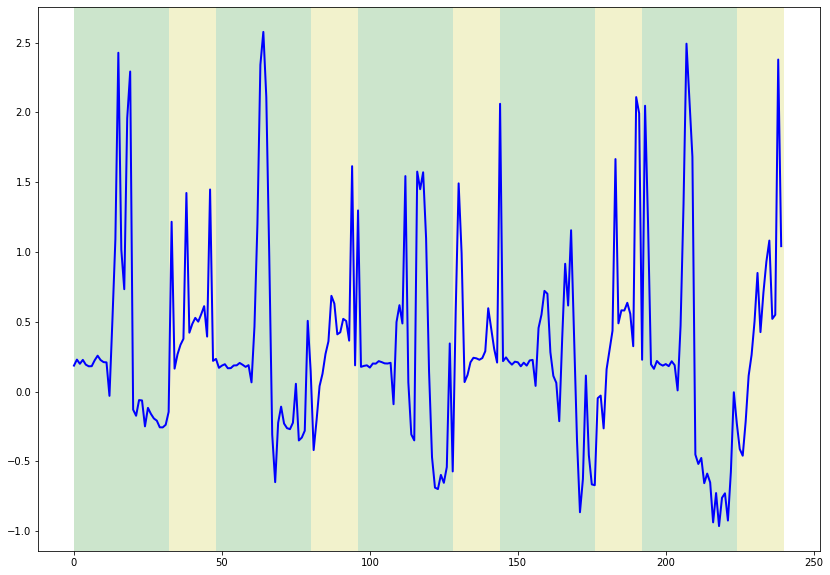

In [8]:
n = 0

dd_1 = data['res/second/50-48-5-optimistic-True-1-101-True-False-101?test2.pkl'][1]
v_post = dd_1[n]['history_post_net']
v_pre = dd_1[n]['history_pre_net']

#market_cost = np.vstack([dd_1[n]['history_cost'] for n in range(N)]).sum(axis=0).sum()

prices_b = dd_1[n]['allprices'][:, 3]
prices_s = dd_1[n]['allprices'][:, 0]

dd_2 = data['res/second/50-48-5-pesimistic-False-None-101-True-False-101?test2.pkl'][1]
v_def = dd_2[n]['history_post_net'] 
l_def = dd_2[n]['allload']

#bat_cost = np.vstack([dd_2[n]['history_cost'] for n in range(N)]).sum(axis=0).sum()

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111)
#plt.plot(v_market, c='r')
#ax.plot(v_def, c='k')
ax.plot(l_def, c='b', linewidth=2)
#ax.plot(l_market, c='r')
#ax.plot(v_pre, c='orange', linewidth=3)
#ax.plot(v_post, c='red')
for l in range(L):
    color = 'y' if prices_b[l] > 12 else 'g'
    ax.axvspan(l, l+1, facecolor=color, alpha=0.2)

#print(l_def.sum())

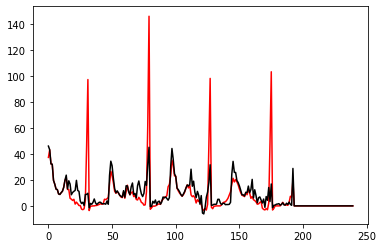

In [9]:
dd_1 = data['res/second/50-48-5-neutral-True-1-80-True-False-80?test2.pkl'][1]
v_market = np.vstack([dd_1[n]['history_post_net'] for n in range(N)]).sum(axis=0)

dd_2 = data['res/second/50-48-5-pesimistic-False-None-80-True-False-80?test2.pkl'][1]
v_def = np.vstack([dd_2[n]['history_post_net'] for n in range(N)]).sum(axis=0)

plt.plot(v_market, c='r')
plt.plot(v_def, c='k')

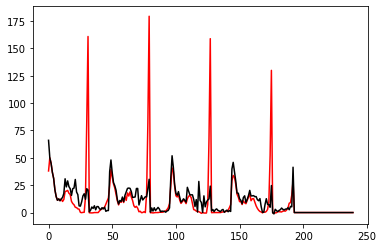

In [17]:
dd_1 = data['res/second/50-48-5-neutral-True-1-50-True-False-50?test2.pkl'][1]
v_market = np.vstack([dd_1[n]['history_post_net'] for n in range(N)]).sum(axis=0)

dd_2 = data['res/second/50-48-5-pesimistic-False-None-50-True-False-50?test2.pkl'][1]
v_def = np.vstack([dd_2[n]['history_post_net'] for n in range(N)]).sum(axis=0)

plt.plot(v_market, c='r')
plt.plot(v_def, c='k')

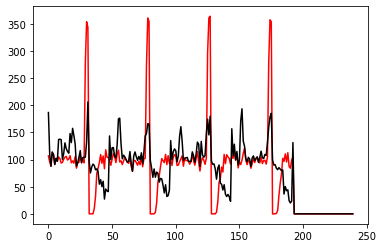

In [11]:
dd_1 = data['res/second/50-48-5-neutral-True-1-200-True-False--1?test2.pkl'][1]
v_market = np.vstack([dd_1[n]['history_post_net'] for n in range(N)]).sum(axis=0)

dd_2 = data['res/second/50-48-5-pesimistic-False-None-200-True-False--1?test2.pkl'][1]
v_def = np.vstack([dd_2[n]['history_post_net'] for n in range(N)]).sum(axis=0)

plt.plot(v_market, c='r')
plt.plot(v_def, c='k')

/home/guso/github/lemsim_code/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


Text(0.5, 1.0, 'Players learn only market prices but not market quantities. Flat Rate')

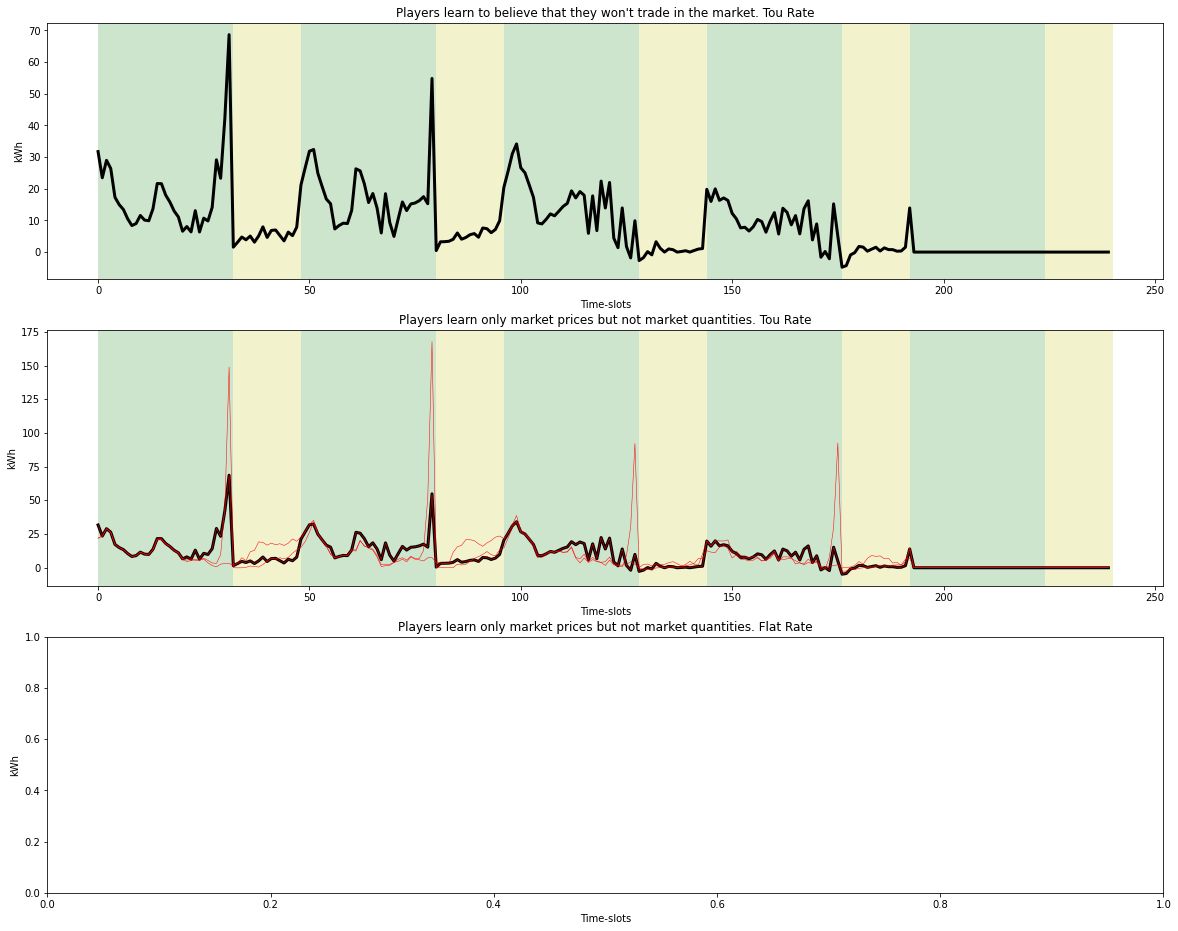

In [14]:
fig, ax = plt.subplots(3, 1, figsize=(20, 16))

SEED = 101

df_ = df[(df.seed == SEED)]

no_market_tou_idx = df_[(df_.freq == 'None') & (df.flat==False)].index[0] 
data_ = data[KEYS[no_market_tou_idx]][1]
prices_tou = ['y' if p > 12 else 'g' for p in data_[0]['allprices'][:,3]]
val_no_market_tou = np.vstack([data_[n]['history_post_net'] for n in range(N)]).sum(axis=0)[:L]

#no_market_flat_idx = df_[(df_.freq == 'None') & (df.flat==True)].index[0] 
#data_ = data[KEYS[no_market_flat_idx]][1]
#prices_flat = ['y' if p > 12 else 'g' for p in data_[0]['allprices'][:,3]]
#val_no_market_flat = np.vstack([data_[n]['history_post_net'] for n in range(N)]).sum(axis=0)[:433]

upq_tou_idx = df_[(df_.only_update_price == False) & (df_.flat == False)].index.values
up_tou_idx = df_[(df_.only_update_price == True) & (df_.flat == False)].index.values
#up_flat_idx = df_[(df_.only_update_price == True) & (df_.flat == True)].index.values


for l in range(L):
    ax[0].axvspan(l, l+1, facecolor=prices_tou[l], alpha=0.2)
    ax[1].axvspan(l, l+1, facecolor=prices_tou[l], alpha=0.2)
    #ax[2].axvspan(l, l+1, facecolor=prices_flat[l], alpha=0.2)

ax[0].plot(val_no_market_tou, c='k', linewidth=3)
ax[1].plot(val_no_market_tou, c='k', linewidth=3)
#ax[2].plot(val_no_market_flat, c='k', linewidth=3)

for i in range(3):
    ax[i].set_xlabel('Time-slots')
    ax[i].set_ylabel('kWh')
    
    
## Update prices and quantities, TOU
for idx in upq_tou_idx:
    k = KEYS[idx]
    data_ = data[k][1]
    val = np.vstack([data_[n]['history_post_net'] for n in range(N)]).sum(axis=0)[:L]
    ax[0].plot(val, c='r', linewidth = 0.5)
    
## Update only prices, TOU
for idx in up_tou_idx:
    k = KEYS[idx]
    data_ = data[k][1]
    val = np.vstack([data_[n]['history_post_net'] for n in range(N)]).sum(axis=0)[:L]
    ax[1].plot(val, c='r', linewidth = 0.5)
    
## Update prices and quantities, flat rate
#for idx in upq_flat_idx:
#    k = KEYS[idx]
#    data_ = data[k][1]
#    val = np.vstack([data_[n]['history_post_net'] for n in range(N)]).sum(axis=0)[:433]
#    ax[2].plot(val, c='r', linewidth = 0.5)

# Upadte only prices, flat rate
#for idx in up_flat_idx:
#    k = KEYS[idx]
#    data_ = data[k][1]
#    val = np.vstack([data_[n]['history_post_net'] for n in range(N)]).sum(axis=0)[:433]
#    ax[2].plot(val, c='r', linewidth = 0.5)

ax[0].set_title("Players learn to believe that they won't trade in the market. Tou Rate")
ax[1].set_title("Players learn only market prices but not market quantities. Tou Rate")
ax[2].set_title("Players learn only market prices but not market quantities. Flat Rate")

#fig.savefig('Figure_1.png', dpi=200)

In [19]:
PT = 'solar'

In [20]:
def plot_pre_post(PT):
    df_ = df[(df.seed == 69) & (df.freq == '5') & (df.pt == PT) & (df.flat == False)]
    df_

    UP = df_[(df_.only_update_price == True)].index[0]
    UPQ = df_[(df_.only_update_price == False)].index[0]

    fig, ax = plt.subplots(2, 1, figsize=(20, 16))



    # UPQ
    data_ = data[KEYS[UPQ]][1]
    prices_TOU = ['y' if p > 12 else 'g' for p in data_[0]['allprices'][:,3]]
    val_UPQ_pre = np.vstack([data_[n]['history_pre_net'] for n in range(N)]).sum(axis=0)[:433]
    val_UPQ_post = np.vstack([data_[n]['history_post_net'] for n in range(N)]).sum(axis=0)[:433]

    for l in range(433):
        ax[0].axvspan(l, l+1, facecolor=prices_tou[l], alpha=0.2)
        ax[1].axvspan(l, l+1, facecolor=prices_tou[l], alpha=0.2)

    ax[1].plot(val_UPQ_pre, c='b', label='Quantity bidded in the market')
    ax[1].plot(val_UPQ_post, c='k',label='Real quantity consumed at the end of the period')
    ax[1].legend()
    ax[1].set_title('[{0}] Players learn that they do not trade that much in the market. Dumping effect at the end'.format(PT))

    # UP
    data_ = data[KEYS[UP]][1]
    prices_TOU = ['y' if p > 12 else 'g' for p in data_[0]['allprices'][:,3]]
    val_UP_pre = np.vstack([data_[n]['history_pre_net'] for n in range(N)]).sum(axis=0)[:433]
    val_UP_post = np.vstack([data_[n]['history_post_net'] for n in range(N)]).sum(axis=0)[:433]


    ax[0].plot(val_UP_pre, c='b', label='Quantity bidded in the market')
    ax[0].plot(val_UP_post, c='k',label='Real quantity consumed at the end of the period')
    ax[0].legend()
    ax[0].set_title('[{0}] Players remain optimistic about the amount of energy they will trade in the market'.format(PT))

    #fig.savefig("Figure_2_{0}.png".format(PT), dpi=200)


In [23]:
#plot_pre_post("solar")
#plot_pre_post("optimistic")
plot_pre_post("pesimistic")

IndexError: index 0 is out of bounds for axis 0 with size 0